In [68]:
# Install gymnasium (in particular the toy-text subset)
!pip install gymnasium[toy-text]


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
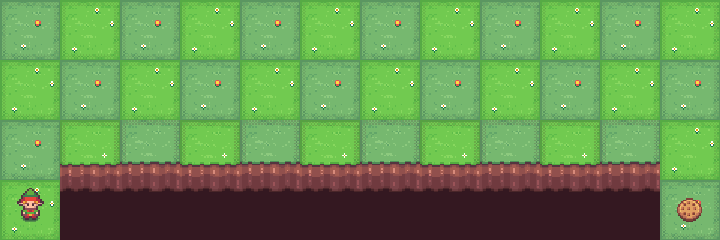

In [69]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")

env.reset()
env.render()



In [70]:
nS = env.observation_space.n  # number of states (48)
nA = env.action_space.n       # number of actions (4 directions)
print(f"{nS}, {nA}")


48, 4


In [71]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    Generate a random policy: a 1D array of length # of states,
    where each element is a random action between 0 and # of actions (exclusive).
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

policy_seed = 17
policy = generate_random_policy(nA, nS, policy_seed)
print("*** Policy ***")
print(policy.reshape((4, 12)))


*** Policy ***
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]


In [72]:
def run_episode(env, pi, printinfo=False):
    """
    Run a single episode using a given policy and return stats like steps, near-falls, and rewards.
    """
    s = env.reset(seed=None)[0]
    done = False
    total_rewards = 0
    steps = 0
    near_falls = 0

    while not done:
        a = pi[s]
        next_s, r, done, _, _ = env.step(a)
        steps += 1
        total_rewards += r
        if r == -100:
            near_falls += 1
        s = next_s

    return steps, near_falls, total_rewards

steps, near_falls, total_rewards = run_episode(env, policy)
print(f"Steps: {steps}, Near Falls: {near_falls}, Total Rewards: {total_rewards}")


Steps: 485, Near Falls: 33, Total Rewards: -3752


In [73]:
def analyze_policy(env, policy_seed, episode_seed, num_runs=100):
    """
    Analyze a policy over multiple runs and compute stats like mean steps, rewards, etc.
    """
    env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")
    policy = generate_random_policy(nA, nS, policy_seed)

    all_steps = []
    all_falls = []
    all_rewards = []

    for run_num in range(num_runs):
        run_seed = episode_seed + run_num
        steps, falls, rewards = run_episode(env, policy, run_seed)
        all_steps.append(steps)
        all_falls.append(falls)
        all_rewards.append(rewards)

    return policy, np.array(all_steps), np.array(all_falls), np.array(all_rewards)


policy_seed = 17
policy, steps, falls, rewards = analyze_policy(env, policy_seed,)


print(f"Mean Steps: {np.mean(steps)}, Mean Near Falls: {np.mean(falls)}, Mean Rewards: {np.mean(rewards)}")


Mean Steps: 3913.83, Mean Near Falls: 230.56, Mean Rewards: -26739.27


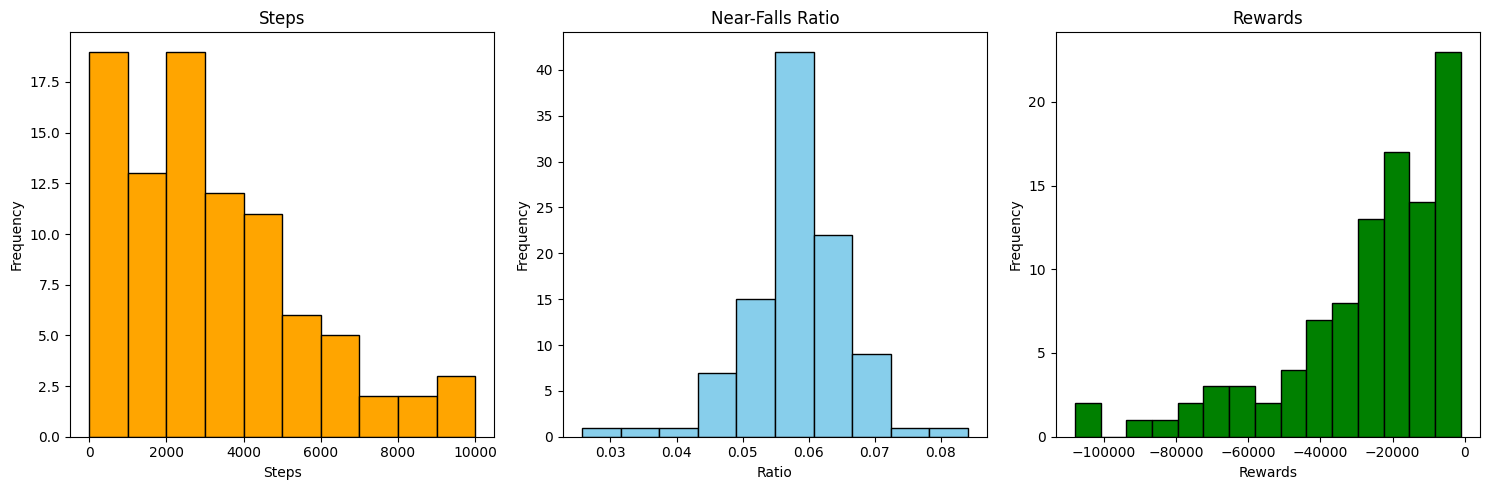

In [74]:
def plot_results(steps, falls, rewards):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


    ax1.hist(steps, bins=np.linspace(0, 10000, 11), color="orange", edgecolor="black")
    ax1.set_title("Steps")
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Frequency")


    near_falls_ratio = falls / steps
    ax2.hist(near_falls_ratio, bins=10, color="skyblue", edgecolor="black")
    ax2.set_title("Near-Falls Ratio")
    ax2.set_xlabel("Ratio")
    ax2.set_ylabel("Frequency")


    ax3.hist(rewards, bins=15, color="green", edgecolor="black")
    ax3.set_title("Rewards")
    ax3.set_xlabel("Rewards")
    ax3.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot the results with colors
plot_results(steps, falls, rewards)


In [75]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    Generate a random policy: a 1D array of length # of states,
    where each element is a random action between 0 and # of actions (exclusive).
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

policy_seed =  79
policy = generate_random_policy(nA, nS, policy_seed)
print("*** Policy ***")
print(policy.reshape((4, 12)))




*** Policy ***
[[0 3 3 0 3 3 1 0 2 0 3 0]
 [0 1 2 1 2 0 2 2 2 2 3 2]
 [0 0 3 0 3 3 3 0 0 3 0 3]
 [0 1 1 3 3 3 0 0 1 2 0 3]]


In [76]:
 def run_episode(env, pi, printinfo=False):
    """
    Run a single episode using a given policy and return stats like steps, near-falls, and rewards.
    """
    s = env.reset(seed=None)[0]
    done = False
    total_rewards = 0
    steps = 0
    near_falls = 0

    while not done:
        a = pi[s]
        next_s, r, done, _, _ = env.step(a)
        steps += 1
        total_rewards += r
        if r == -100:
            near_falls += 1
        s = next_s

    return steps, near_falls, total_rewards

steps, near_falls, total_rewards = run_episode(env, policy)
print(f"Steps: {steps}, Near Falls: {near_falls}, Total Rewards: {total_rewards}")


Steps: 4494, Near Falls: 235, Total Rewards: -27759


In [78]:
def analyze_policy(env, policy_seed, episode_seed, num_runs=100):
    """
    Analyze a policy over multiple runs and compute stats like mean steps, rewards, etc.
    """
    env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")
    policy = generate_random_policy(nA, nS, policy_seed)

    all_steps = []
    all_falls = []
    all_rewards = []

    for run_num in range(num_runs):
        run_seed = episode_seed + run_num
        steps, falls, rewards = run_episode(env, policy, run_seed)
        all_steps.append(steps)
        all_falls.append(falls)
        all_rewards.append(rewards)


    return policy, np.array(all_steps), np.array(all_falls), np.array(all_rewards)


policy_seed = 79
policy, steps, falls, rewards = analyze_policy(env, policy_seed, episode_seed)


print(f"Mean Steps: {np.mean(steps)}, Mean Near Falls: {np.mean(falls)}, Mean Rewards: {np.mean(rewards)}")


Mean Steps: 27040.58, Mean Near Falls: 1229.47, Mean Rewards: -148758.11


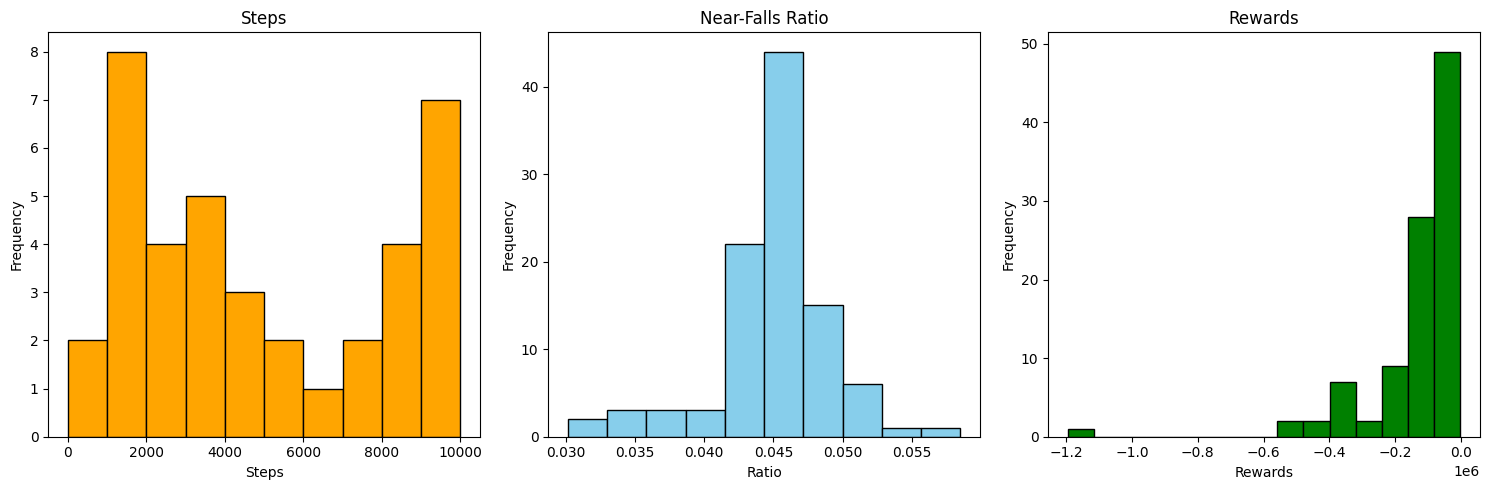

In [63]:
def plot_results(steps, falls, rewards):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


    ax1.hist(steps, bins=np.linspace(0, 10000, 11), color="orange", edgecolor="black")
    ax1.set_title("Steps")
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Frequency")


    near_falls_ratio = falls / steps
    ax2.hist(near_falls_ratio, bins=10, color="skyblue", edgecolor="black")
    ax2.set_title("Near-Falls Ratio")
    ax2.set_xlabel("Ratio")
    ax2.set_ylabel("Frequency")


    ax3.hist(rewards, bins=15, color="green", edgecolor="black")
    ax3.set_title("Rewards")
    ax3.set_xlabel("Rewards")
    ax3.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot the results with colors
plot_results(steps, falls, rewards)


*** Policy ***
[[3 0 2 2 0 2 2 1 2 0 3 0]
 [1 1 0 1 2 0 0 0 0 3 0 2]
 [3 3 0 3 3 2 1 0 0 3 3 1]
 [1 0 1 3 1 3 1 1 2 1 1 1]]
Steps: 360, Near Falls: 8, Total Rewards: -1152
Mean Steps: 1516.56, Mean Near Falls: 110.9, Mean Rewards: -12495.66


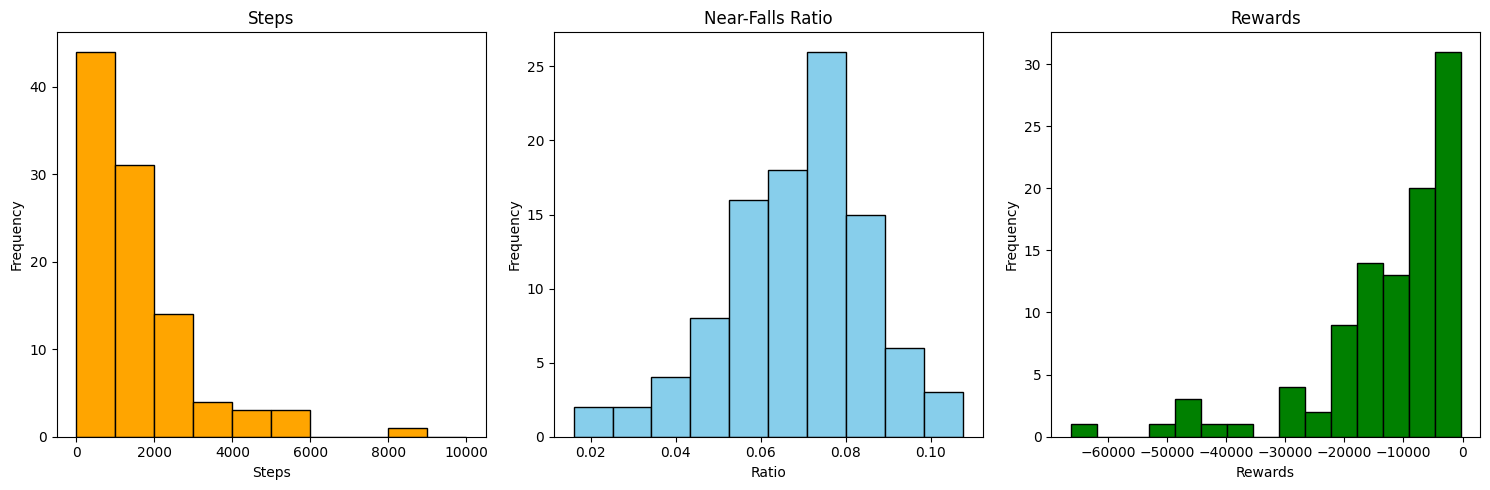

In [79]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    Generate a random policy: a 1D array of length # of states,
    where each element is a random action between 0 and # of actions (exclusive).
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

policy_seed =  29
policy = generate_random_policy(nA, nS, policy_seed)
print("*** Policy ***")
print(policy.reshape((4, 12)))

def run_episode(env, pi, printinfo=False):
    """
    Run a single episode using a given policy and return stats like steps, near-falls, and rewards.
    """
    s = env.reset(seed=None)[0]
    done = False
    total_rewards = 0
    steps = 0
    near_falls = 0

    while not done:
        a = pi[s]
        next_s, r, done, _, _ = env.step(a)
        steps += 1
        total_rewards += r
        if r == -100:
            near_falls += 1
        s = next_s

    return steps, near_falls, total_rewards

steps, near_falls, total_rewards = run_episode(env, policy)
print(f"Steps: {steps}, Near Falls: {near_falls}, Total Rewards: {total_rewards}")

def analyze_policy(env, policy_seed, episode_seed, num_runs=100):
    """
    Analyze a policy over multiple runs and compute stats like mean steps, rewards, etc.
    """
    env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")
    policy = generate_random_policy(nA, nS, policy_seed)

    all_steps = []
    all_falls = []
    all_rewards = []

    for run_num in range(num_runs):
        run_seed = episode_seed + run_num
        steps, falls, rewards = run_episode(env, policy, run_seed)
        all_steps.append(steps)
        all_falls.append(falls)
        all_rewards.append(rewards)


    return policy, np.array(all_steps), np.array(all_falls), np.array(all_rewards)


policy_seed = 29
policy, steps, falls, rewards = analyze_policy(env, policy_seed, episode_seed)


print(f"Mean Steps: {np.mean(steps)}, Mean Near Falls: {np.mean(falls)}, Mean Rewards: {np.mean(rewards)}")
def plot_results(steps, falls, rewards):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


    ax1.hist(steps, bins=np.linspace(0, 10000, 11), color="orange", edgecolor="black")
    ax1.set_title("Steps")
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Frequency")


    near_falls_ratio = falls / steps
    ax2.hist(near_falls_ratio, bins=10, color="skyblue", edgecolor="black")
    ax2.set_title("Near-Falls Ratio")
    ax2.set_xlabel("Ratio")
    ax2.set_ylabel("Frequency")


    ax3.hist(rewards, bins=15, color="green", edgecolor="black")
    ax3.set_title("Rewards")
    ax3.set_xlabel("Rewards")
    ax3.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot the results with colors
plot_results(steps, falls, rewards)



*** Policy ***
[[0 2 0 1 2 2 2 3 2 0 2 2]
 [0 0 3 0 0 1 3 2 1 3 0 0]
 [0 1 2 3 1 0 3 3 3 0 1 1]
 [0 2 3 1 3 0 0 2 3 0 0 0]]
Steps: 10095, Near Falls: 513, Total Rewards: -60882
Mean Steps: 26763.69, Mean Near Falls: 1331.44, Mean Rewards: -158576.25


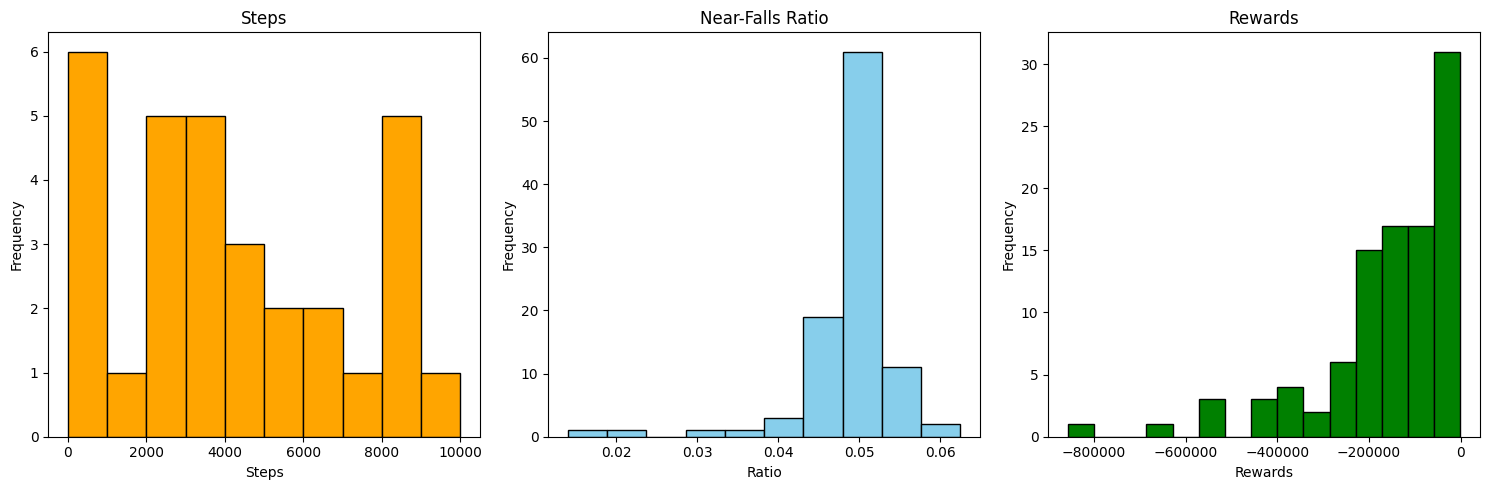

In [80]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    Generate a random policy: a 1D array of length # of states,
    where each element is a random action between 0 and # of actions (exclusive).
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

policy_seed =  97
policy = generate_random_policy(nA, nS, policy_seed)
print("*** Policy ***")
print(policy.reshape((4, 12)))

def run_episode(env, pi, printinfo=False):
    """
    Run a single episode using a given policy and return stats like steps, near-falls, and rewards.
    """
    s = env.reset(seed=None)[0]
    done = False
    total_rewards = 0
    steps = 0
    near_falls = 0

    while not done:
        a = pi[s]
        next_s, r, done, _, _ = env.step(a)
        steps += 1
        total_rewards += r
        if r == -100:
            near_falls += 1
        s = next_s

    return steps, near_falls, total_rewards

steps, near_falls, total_rewards = run_episode(env, policy)
print(f"Steps: {steps}, Near Falls: {near_falls}, Total Rewards: {total_rewards}")

def analyze_policy(env, policy_seed, episode_seed, num_runs=100):
    """
    Analyze a policy over multiple runs and compute stats like mean steps, rewards, etc.
    """
    env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")
    policy = generate_random_policy(nA, nS, policy_seed)

    all_steps = []
    all_falls = []
    all_rewards = []

    for run_num in range(num_runs):
        run_seed = episode_seed + run_num
        steps, falls, rewards = run_episode(env, policy, run_seed)
        all_steps.append(steps)
        all_falls.append(falls)
        all_rewards.append(rewards)


    return policy, np.array(all_steps), np.array(all_falls), np.array(all_rewards)


policy_seed = 97
policy, steps, falls, rewards = analyze_policy(env, policy_seed, episode_seed)


print(f"Mean Steps: {np.mean(steps)}, Mean Near Falls: {np.mean(falls)}, Mean Rewards: {np.mean(rewards)}")
def plot_results(steps, falls, rewards):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))


    ax1.hist(steps, bins=np.linspace(0, 10000, 11), color="orange", edgecolor="black")
    ax1.set_title("Steps")
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Frequency")


    near_falls_ratio = falls / steps
    ax2.hist(near_falls_ratio, bins=10, color="skyblue", edgecolor="black")
    ax2.set_title("Near-Falls Ratio")
    ax2.set_xlabel("Ratio")
    ax2.set_ylabel("Frequency")


    ax3.hist(rewards, bins=15, color="green", edgecolor="black")
    ax3.set_title("Rewards")
    ax3.set_xlabel("Rewards")
    ax3.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot the results with colors
plot_results(steps, falls, rewards)



In [86]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

# Initialize the environment
env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")

# Display basic environment information
print(f"Number of States: {env.observation_space.n}")
print(f"Number of Actions: {env.action_space.n}")

def policy_iteration(env, gamma=0.8, theta=1e-6):
    """
    Policy Iteration Algorithm for finding the optimal policy in an MDP.

    Args:
        env: The environment (Gym environment).
        gamma: Discount factor (0 <= gamma <= 1).
        theta: Threshold for stopping policy evaluation.

    Returns:
        V: Optimal value function.
        policy: Optimal policy.
    """
    # Initialization
    env = env.unwrapped
    nS = env.observation_space.n  # Number of states
    nA = env.action_space.n       # Number of actions

    # Initialize policy arbitrarily (choose random actions for all states)
    policy = np.random.choice(nA, size=nS)

    # Initialize value function with small non-zero numbers, except for terminal state
    V = np.full(nS, -0.1)  # Small negative numbers
    V[-1] = 0  # Terminal state's value is 0

    while True:
        # Step 2: Policy Evaluation
        while True:
            delta = 0  # Change in value function
            new_V = np.copy(V)  # Create a new table for updates

            for s in range(nS):
                v = V[s]  # Store current value for comparison
                a = policy[s]  # Action according to the current policy

                # Compute the value of state s under policy
                new_V[s] = sum([prob * (reward + gamma * V[next_state])
                                for prob, next_state, reward, _ in env.P[s][a]])

                # Track the maximum change in value for convergence
                delta = max(delta, abs(v - new_V[s]))

            # Copy the new values into the current value table
            V = np.copy(new_V)

            # Stop evaluation when the values are stable
            if delta < theta:
                break

        # Step 3: Policy Improvement
        policy_stable = True
        for s in range(nS):
            old_action = policy[s]

            # Find the best action for the current state
            action_values = np.zeros(nA)
            for a in range(nA):
                action_values[a] = sum([prob * (reward + gamma * V[next_state])
                                        for prob, next_state, reward, _ in env.P[s][a]])

            # Choose the action with the highest value
            policy[s] = np.argmax(action_values)

            # Check if the policy has changed
            if old_action != policy[s]:
                policy_stable = False

        # If the policy is stable, we have found the optimal policy
        if policy_stable:
            break

    return V, policy


Number of States: 48
Number of Actions: 4


In [87]:
# Run the policy iteration algorithm
gamma = 0.8  # Discount factor
theta = 1e-6  # Convergence threshold
optimal_value_function, optimal_policy = policy_iteration(env, gamma, theta)

# Display the results
print("Optimal Policy (0: Left, 1: Down, 2: Right, 3: Up):")
print(optimal_policy.reshape(4, 12))

print("\nOptimal Value Function:")
print(optimal_value_function.reshape(4, 12))


Optimal Policy (0: Left, 1: Down, 2: Right, 3: Up):
[[0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [3 0 0 0 0 0 0 0 0 0 0 1]]

Optimal Value Function:
[[ -5.00000006  -5.00000006  -5.00000006  -5.00000006  -5.00000006
   -5.00000006  -5.00000006  -5.00000006  -5.00000006  -5.00000006
   -5.00000006  -5.00000006]
 [ -5.00000006  -5.00000006  -5.00000006  -5.00000006  -5.00000006
   -5.00000006  -5.00000006  -5.00000006  -5.00000006  -5.00000006
   -5.00000006  -5.00000006]
 [ -5.00000006  -5.00000006  -5.00000006  -5.00000006  -5.00000006
   -5.00000006  -5.00000006  -5.00000006  -5.00000006  -5.00000006
   -5.00000006  -5.00000006]
 [ -5.00000006 -38.00000006 -71.00000006 -71.00000006 -71.00000006
  -71.00000006 -71.00000006 -71.00000006 -71.00000006 -71.00000006
  -38.00000006  -5.00000006]]


In [88]:
def simulate_policy(env, policy, num_episodes=100):
    """
    Simulates the environment using the given policy and collects statistics.

    Args:
        env: The environment.
        policy: The derived optimal policy.
        num_episodes: Number of episodes to simulate.

    Returns:
        steps: List of steps taken in each episode.
        near_falls: List of near-falls in each episode.
        rewards: List of rewards collected in each episode.
    """
    steps = []
    near_falls = []
    rewards = []

    for _ in range(num_episodes):
        state = env.reset()[0]
        done = False
        episode_steps = 0
        episode_rewards = 0
        episode_near_falls = 0

        while not done:
            action = policy[state]
            next_state, reward, done, _, _ = env.step(action)
            episode_rewards += reward
            episode_steps += 1
            if 37 <= next_state <= 46:  # Near the cliff states
                episode_near_falls += 1
            state = next_state

        steps.append(episode_steps)
        rewards.append(episode_rewards)
        near_falls.append(episode_near_falls)

    return steps, near_falls, rewards

# Simulate the optimal policy
steps, near_falls, rewards = simulate_policy(env, optimal_policy)


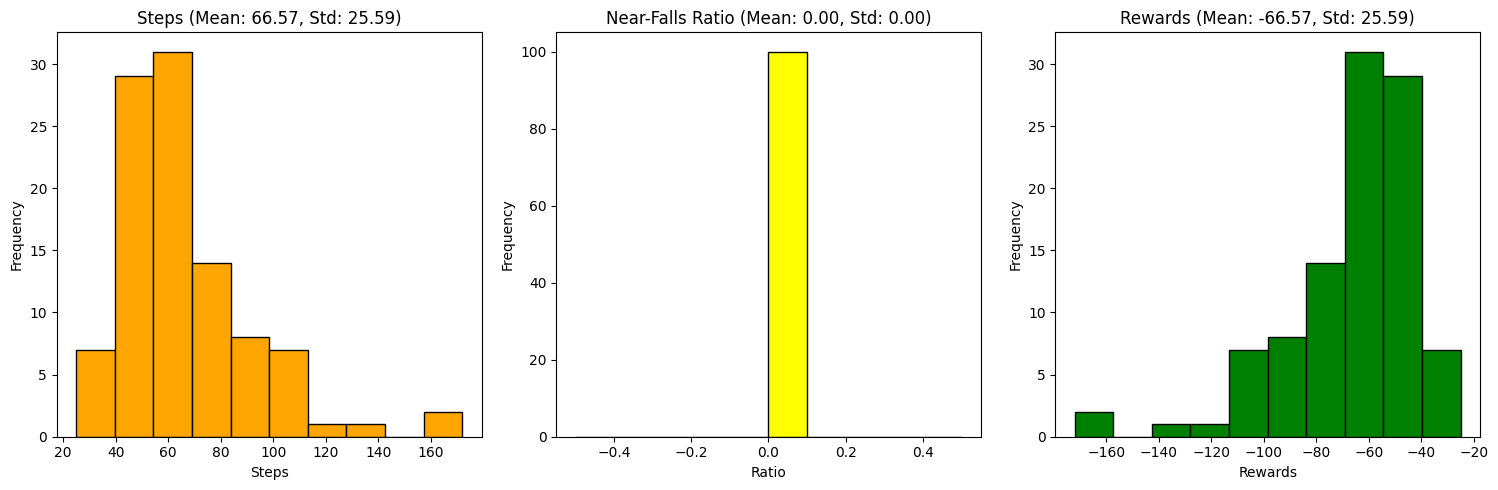

In [89]:
# Function to generate a histogram with statistics in the title
def generate_histogram(steps, near_falls, rewards):
    """
    Generate histograms for steps, near-falls, and rewards with statistics in the title.

    Args:
        steps: List of steps taken in each episode.
        near_falls: List of near-falls in each episode.
        rewards: List of rewards collected in each episode.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Steps Histogram (Orange)
    ax1.hist(steps, bins=10, color="orange", edgecolor="black")
    ax1.set_title(f"Steps (Mean: {np.mean(steps):.2f}, Std: {np.std(steps):.2f})")
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Frequency")

    # Near-Falls Ratio Histogram (Yellow)
    near_falls_ratio = np.array(near_falls) / np.array(steps)
    ax2.hist(near_falls_ratio, bins=10, color="yellow", edgecolor="black")
    ax2.set_title(f"Near-Falls Ratio (Mean: {np.mean(near_falls_ratio):.2f}, Std: {np.std(near_falls_ratio):.2f})")
    ax2.set_xlabel("Ratio")
    ax2.set_ylabel("Frequency")

    # Rewards Histogram (Green)
    ax3.hist(rewards, bins=10, color="green", edgecolor="black")
    ax3.set_title(f"Rewards (Mean: {np.mean(rewards):.2f}, Std: {np.std(rewards):.2f})")
    ax3.set_xlabel("Rewards")
    ax3.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Generate the histograms
generate_histogram(steps, near_falls, rewards)
